## Geometrical characteristics of a straight and tapered wing

In [170]:
%matplotlib inline
%run ./resources/init.py

Let us assign the wing planform shape, i.e. let us assume given values of wing span $b$ and wing chord $c$ that due to the geometry equals both to $c_\mathrm{t}$ and $c_\mathrm{r}$ .

In Python we define the following variables:

In [149]:
b=26.0
sweep_angle=0
c_r=2.50
c_t=1.25
taper=c_t/c_r

These data gaves us the following wing shape:

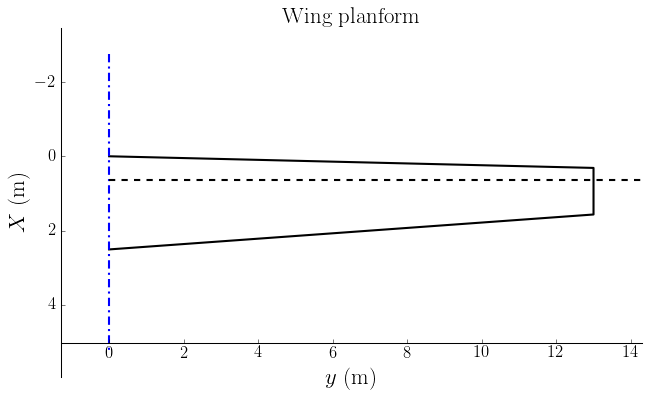

In [150]:
plot_planform(c_r, c_t, b)

In [151]:
Latex(
  r'\begin{array}{rl}'
     +  r'\text{Wing Span,}\, b: & ' + r'{0:.4}'.format(b) + r'\,\text{m}'
     +  r'\\'
     +  r'\text{Sweep Angle,}\, \Lambda_{\mathrm{c/4}}: & ' + r'{0}'.format(sweep_angle) + r'\,\text{rad}'
     +  r'\\' 
     +  r'\text{Leading Edge Sweep Angle,}\, \Lambda_{\mathrm{le}}: & ' + r'{0}'.format(sweep_angle) + r'\,\text{rad}'
     +  r'\\'
     +  r'\text{Root Chord,}\, c_r: & ' + r'{0}'.format(c_r) + r'\,\text{m}'
     +  r'\\'
     +  r'\text{Tip Chord,}\, c_r: & ' + r'{0}'.format(c_t) + r'\,\text{m}'
     +  r'\\'
     +  r'\text{Taper ratio,}\, \lambda: & ' + r'{0}'.format(taper) + r'\,\text{m}'
  + r'\end{array}')

<IPython.core.display.Latex object>

We can calculate now some geometric data depending on the assigned shape:
\begin{equation}
S,\,AR,\,\bar{c},\,\,X_\mathrm{le,\bar{c}},\,Y_\mathrm{\bar{c}}
\end{equation}

The Taper ratio is given by:


In [152]:
Latex( r'\begin{align*}'
         +r' \lambda = \dfrac{c_{\mathrm{t}}}{ c_{\mathrm{r}}}=' 
         +r'{0}' .format(taper)
      +r'\end{align*}')

<IPython.core.display.Latex object>

The law of the chord is:
\begin{equation}
c(Y)=A_cY+B_c
\end{equation}

Naturally:
 \begin{equation}
    c(0)=c_r
 \end{equation}
and
  \begin{equation}
    c(b/2)=c_t
  \end{equation}

We can calculate the coefficients of the chords law with the two following formulas  :

In [153]:
A_c=2*(c_t-c_r)/b
B_c=c_r

In [154]:
display_workflowACBC(c_r,c_t,A_c,B_c,b)

<IPython.core.display.Latex object>

So we have:

In [155]:
display(Math(r'c(y) =\,' + '{0:.3}'.format(A_c) + '\,y + ' + '{0:.3}'.format(B_c) + r'\,\text{m}'))

<IPython.core.display.Math object>

The reference wing surface in this case is composed by 2 times the area of the trapezium with $c_t$ and $c_r$ as bases and $\dfrac{1}{2}b$ as height.
If we integrate the law $c(y)$ over the span we have again the value of $S$:


\begin{equation}
S= 2 \int_0^{b/2} c(y) \, \text{d}y = 2 \int_0^{b/2} \Big( A_c \, y + B_c \Big) \, \text{d}y 
\end{equation}

In [156]:
S=integrate_S(A_c,B_c,b)[0]
Latex(r'$S = \,' + r'{0:.4}$'.format(S) + r'$\,\mathrm{m}^2$')

<IPython.core.display.Latex object>

In [157]:
c_law_integral_indefinite=integrate_S(A_c,B_c,b)[1]
display_workflow_S(b, A_c, B_c, c_law_integral_indefinite, S)

<IPython.core.display.Latex object>

And AR:

In [158]:
AR=(b*b)/S

In [159]:
display_workflowAR(b,S,AR)

<IPython.core.display.Latex object>

Let us calculate $\Lambda_\mathrm{c/4}$ , $\Lambda_\mathrm{c/2}$ and $\Lambda_\mathrm{te}$ by using the generic "n" formula :

\begin{equation}
\text{tan}\,\Lambda_{c/n} = \text{tan}\,\Lambda_{le}\,-\,\frac{(4/n)(1-\lambda)}{\text{AR}(1+\lambda)}
\end{equation}

In [160]:
tan_sweep_angle_le = tan(sweep_angle) + ((4/4)*(1-taper))/(AR*(1+taper))
sweep_angle_le=math.atan(tan_sweep_angle_le)

So for $\Lambda_{c/4}$=0° we have:

In [161]:
display(Math('\Lambda_\mathrm{le}'+' = {0:.4} \,rad'.format(sweep_angle_le)))

<IPython.core.display.Math object>

Let us calculate the value of the mean aerodinamic chord :


In [162]:
c_mean= (2/3)*c_r*(1+taper+(taper)*(taper))/(1+taper)

In [163]:
display_workflowc_mean(c_r,taper,c_mean)

<IPython.core.display.Latex object>

Naturally this is an intermediate value between the root and tip chord.

Let us now calculate the logitudinal distance from the leading edge of the mean aerodinamic chord to the one of the root chord.

\begin{equation}
X_{le,\bar{c}} = \frac{b}{6}\,\frac{ 1 + 2\lambda}{1+\lambda}\,\tan{\Lambda_{le}}
\end{equation}

In [164]:
tan_lambda = math.tan(sweep_angle_le)
x_lec=(b/6)*((1+2*taper)/(1+taper))*tan_lambda

In [165]:
display_workflowXlec(b,taper,tan_lambda,x_lec)

<IPython.core.display.Latex object>

Let us calculate now the distance, computed from wing root, of the mean aerodinamic chord station .
\begin{equation}
Y_{\bar{c}} = \frac{b}{6} \frac{1+2\lambda}{1+\lambda}
\end{equation}


In [166]:
y_lec=(b/6)*((1+2*taper)/(1+taper))

In [171]:
display_workflowYlec(b,taper,tan_lambda,y_lec)

<IPython.core.display.Latex object>

This station of the mean aerodynamic chord  is nearer to root than the tip.